In [79]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [80]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [81]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [82]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m))) * (1 / var)
    w_ = ss @ X.T @ Y
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [83]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.005772996481177217


In [84]:
def display(m, alpha, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


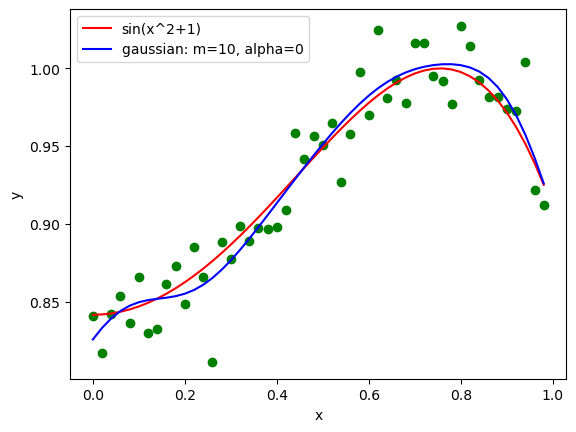

w:  [ 0.72996988  0.16719367 -0.1476552   0.1986823  -0.08718286  0.1951841
 -0.06593278  0.24982187 -0.11057211  0.24781268]


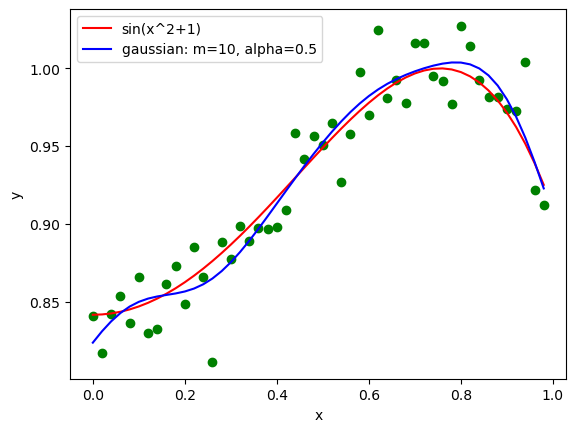

w:  [ 0.74407826  0.11497153 -0.04477905  0.04786562  0.06954001  0.02624514
  0.09967608  0.08502213  0.00478339  0.18986222]


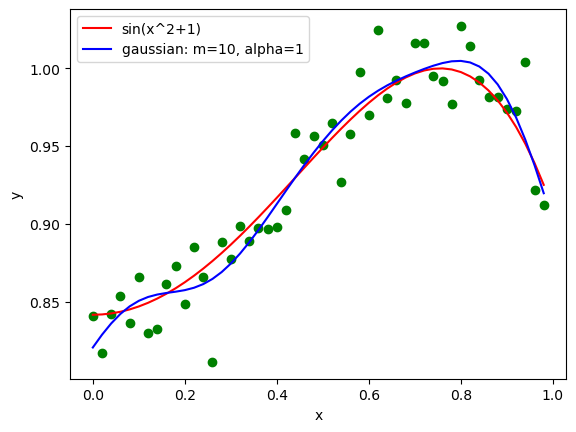

w:  [ 0.73430915  0.12009459 -0.03652898  0.04424959  0.06947746  0.03812331
  0.09938732  0.0798592   0.01654292  0.19237305]


In [85]:
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)
params = [(10, 0), (10, 0.5), (10, 1)]

for m, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



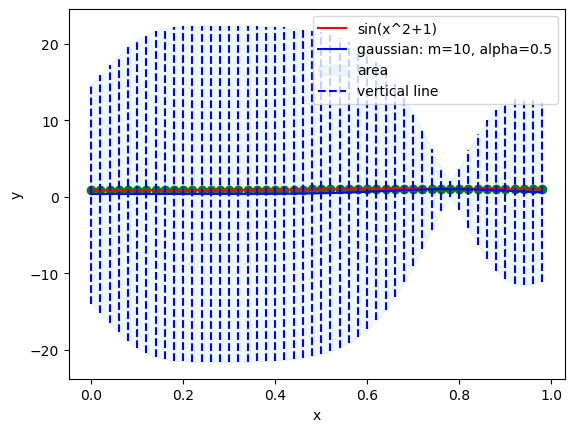

[39]
1


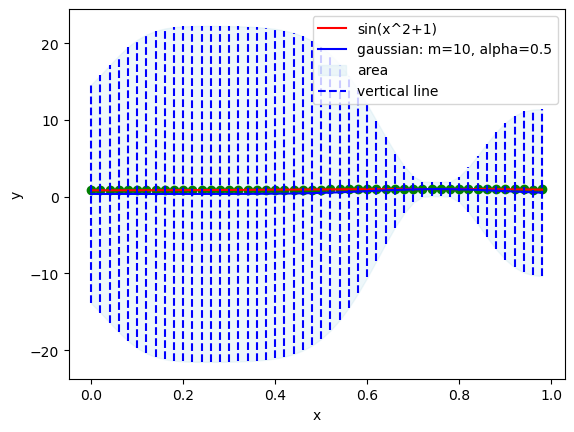

[39, 36]
2


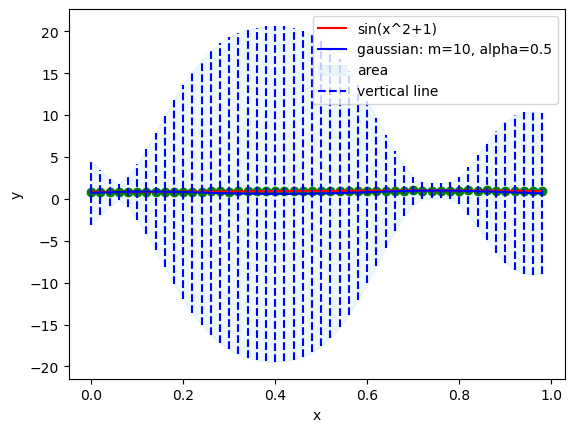

[39, 36, 3]
3


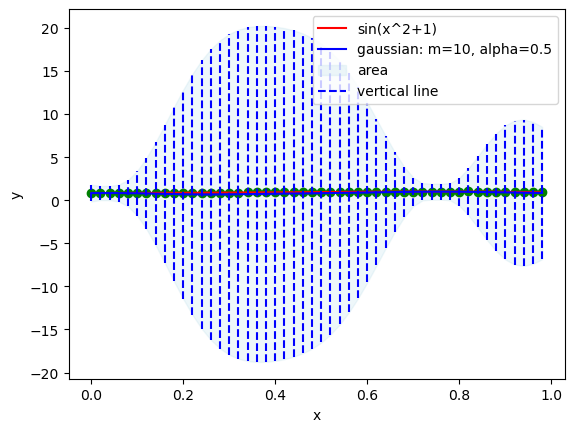

[39, 36, 3, 0]
4


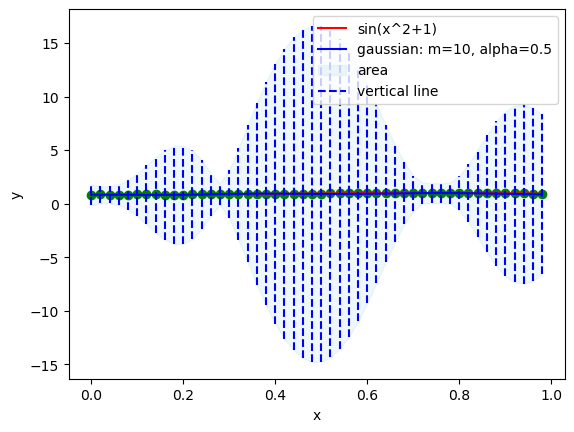

[39, 36, 3, 0, 14]
5


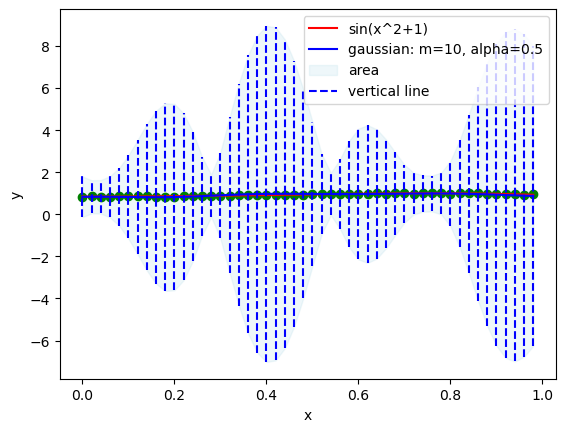

[39, 36, 3, 0, 14, 27]
6


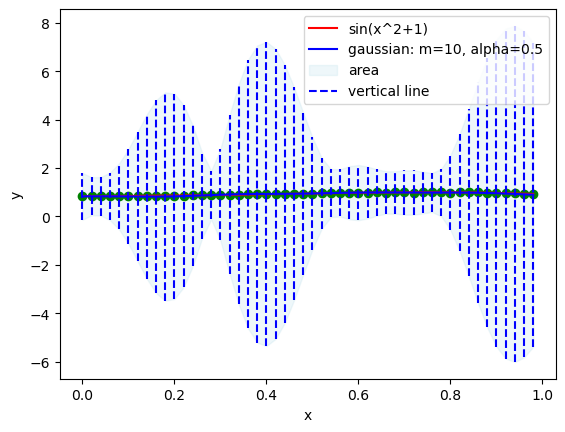

[39, 36, 3, 0, 14, 27, 32]
7


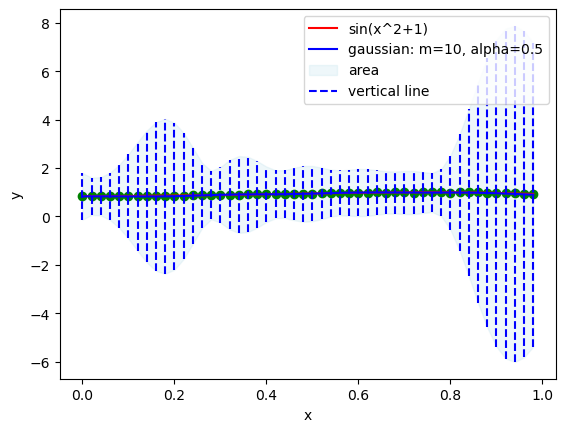

[39, 36, 3, 0, 14, 27, 32, 21]
8


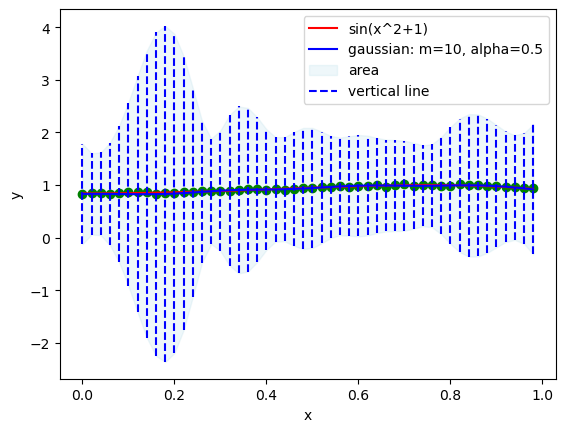

[39, 36, 3, 0, 14, 27, 32, 21, 47]
9


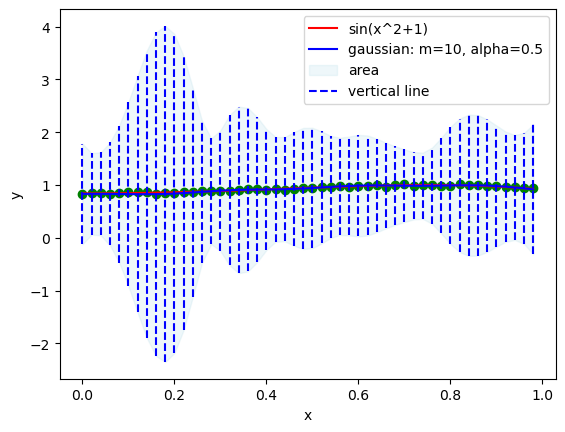

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36]
10


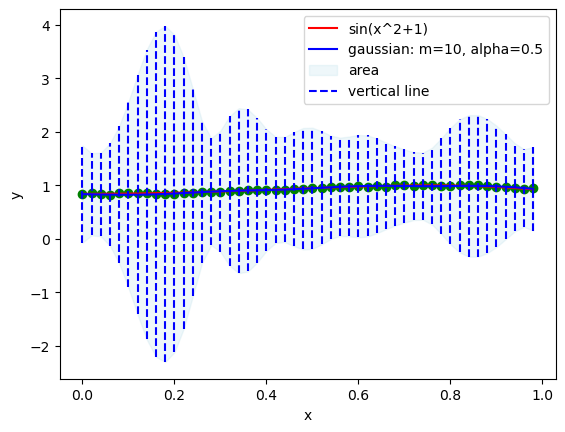

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49]
11


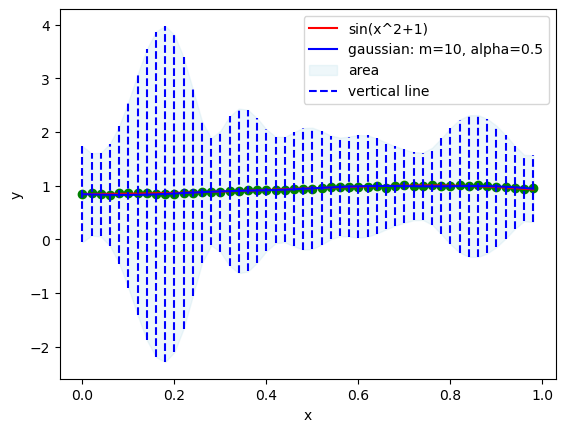

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49]
12


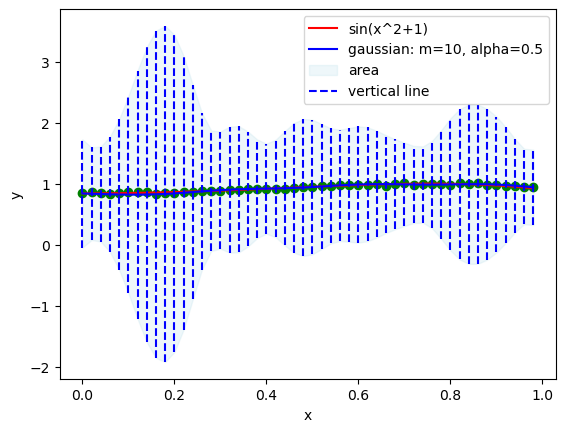

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19]
13


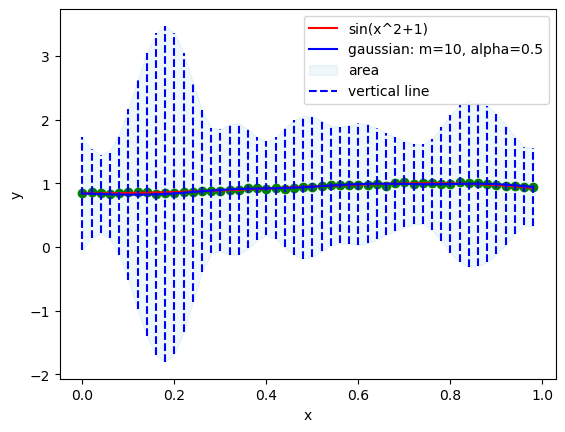

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3]
14


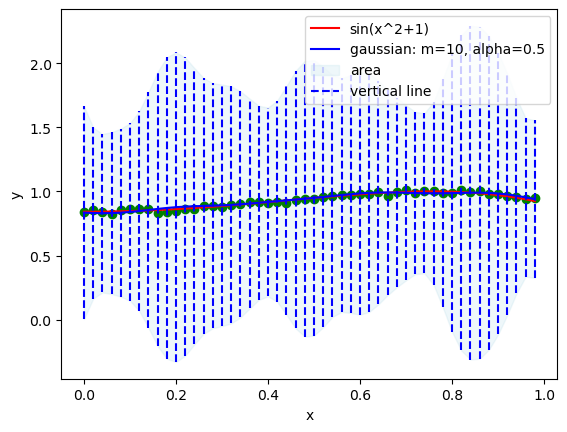

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7]
15


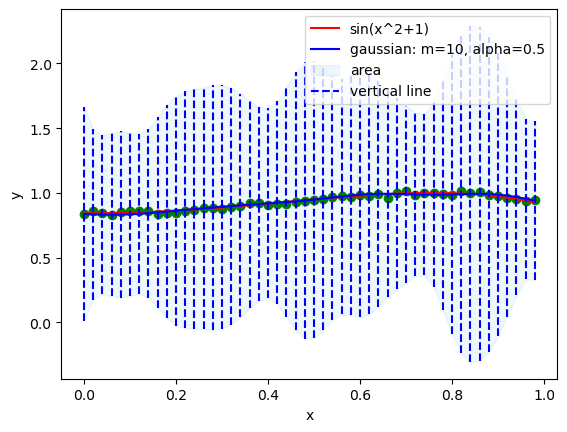

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8]
16


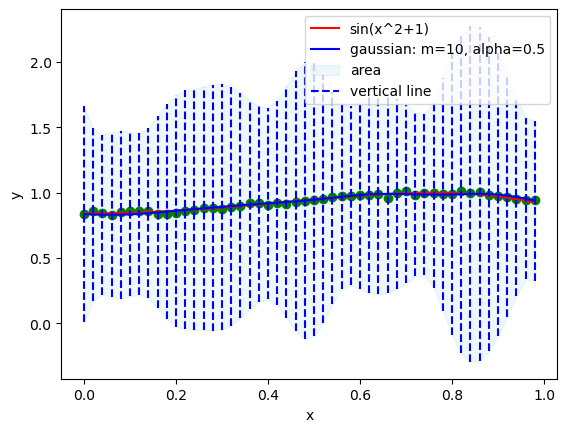

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29]
17


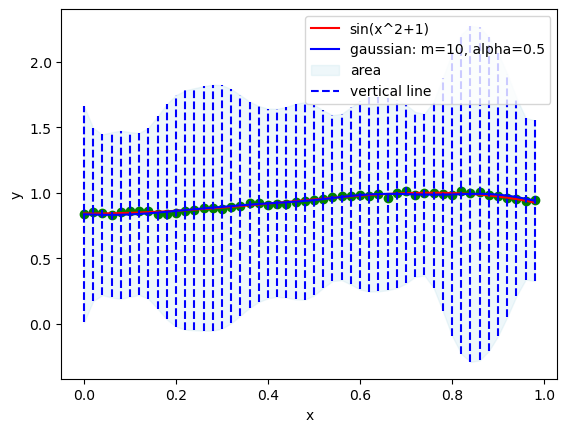

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25]
18


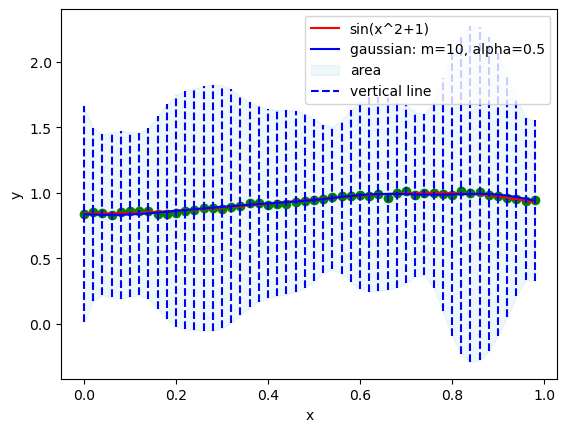

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26]
19


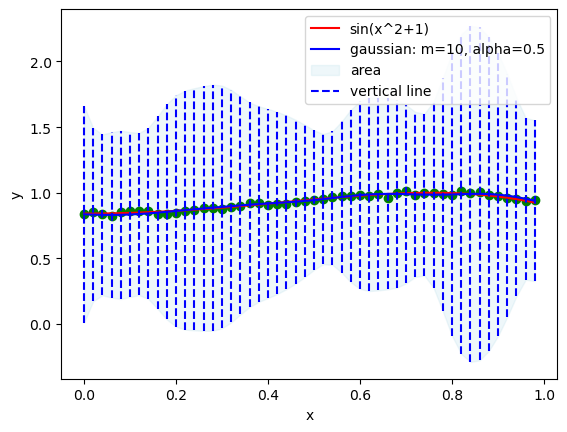

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25]
20


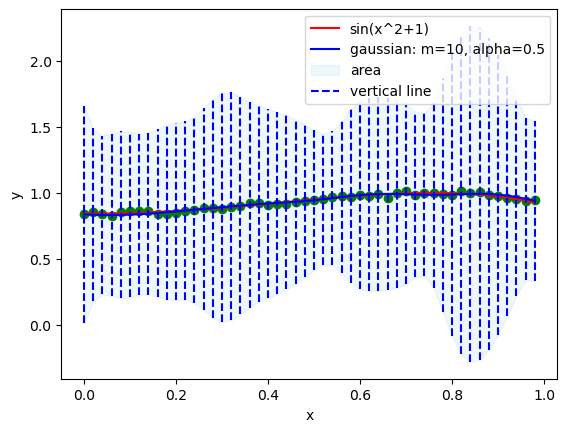

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11]
21


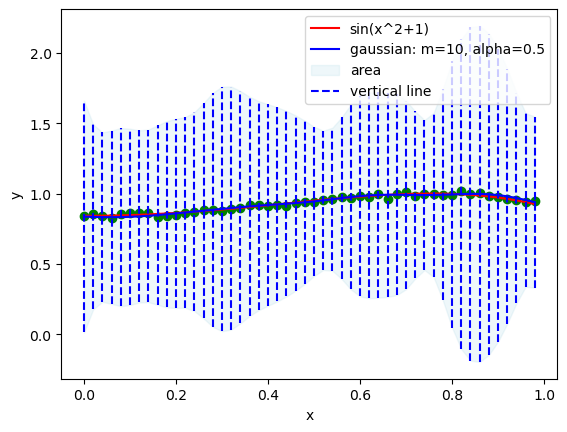

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38]
22


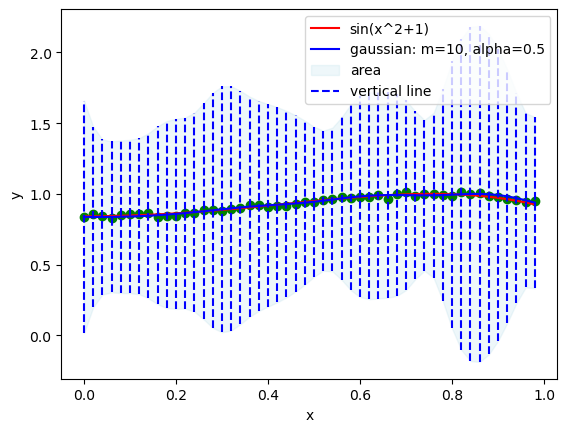

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4]
23


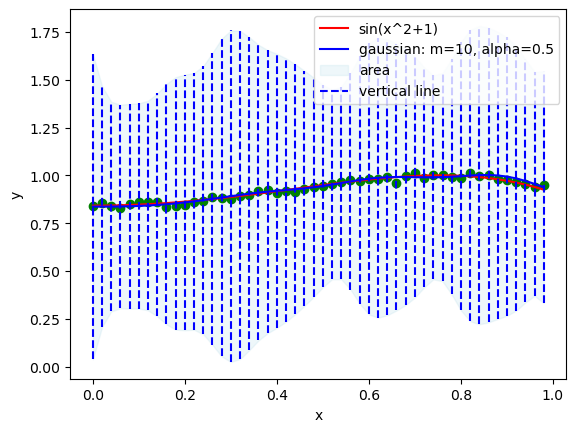

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43]
24


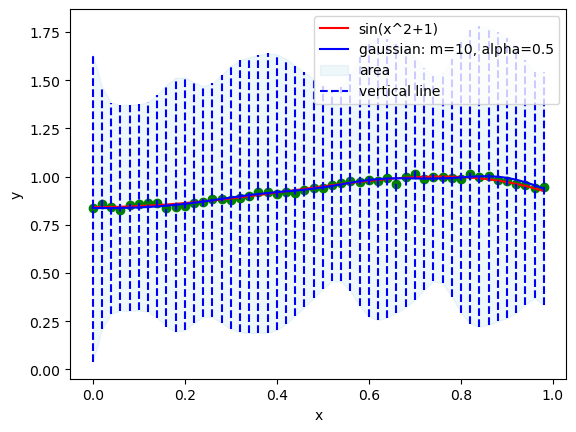

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14]
25


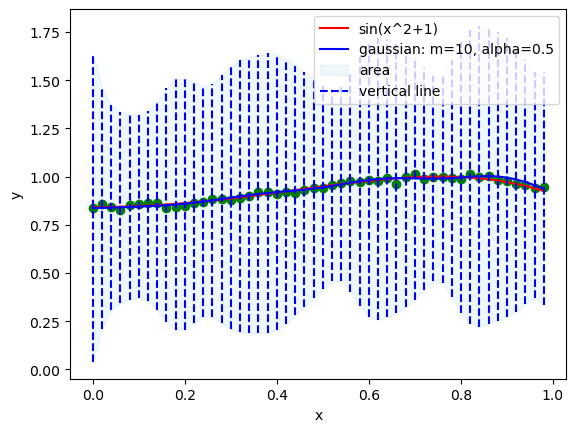

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5]
26


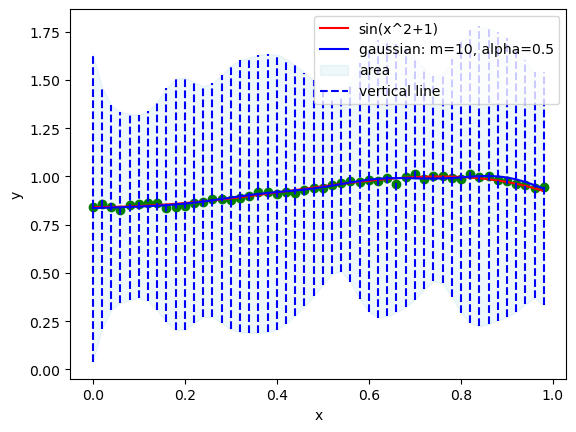

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27]
27


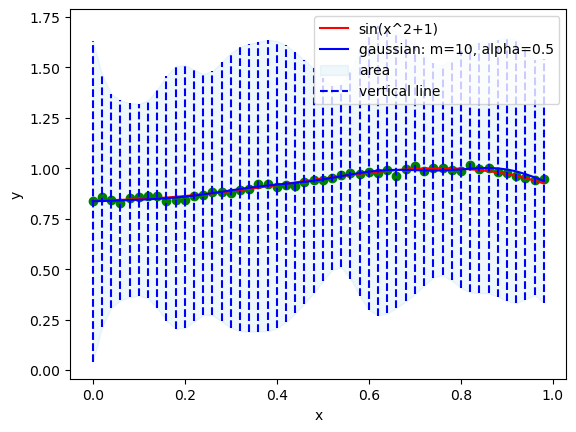

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42]
28


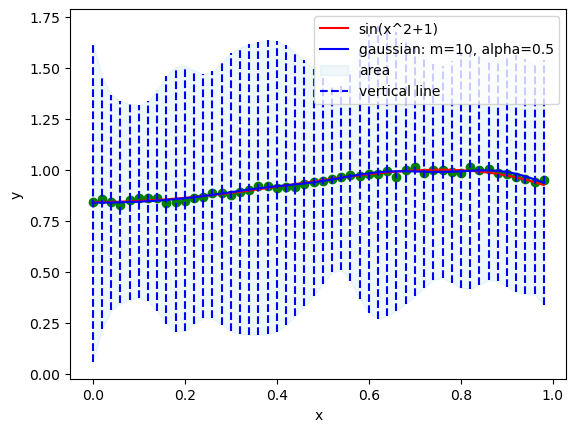

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44]
29


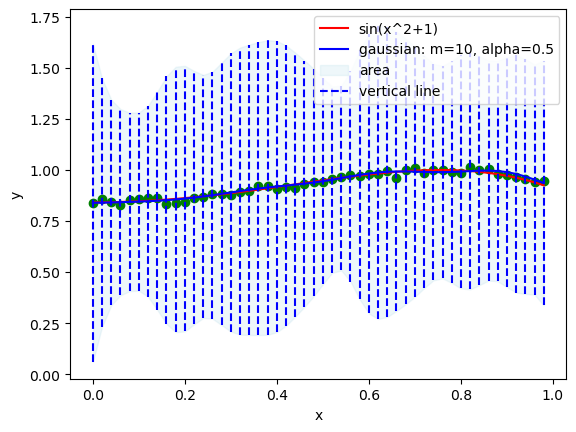

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4]
30


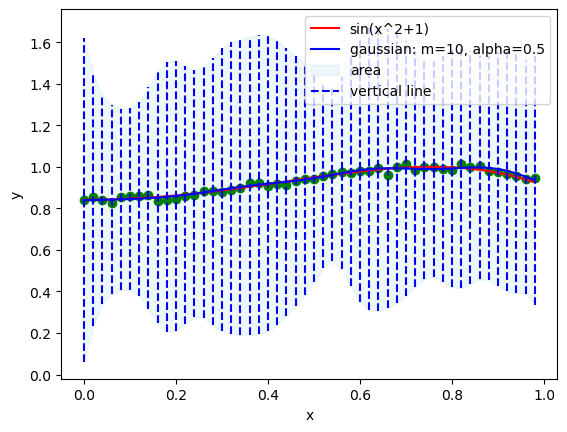

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28]
31


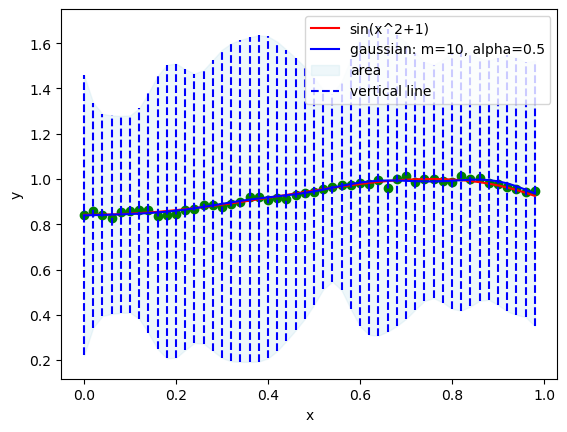

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0]
32


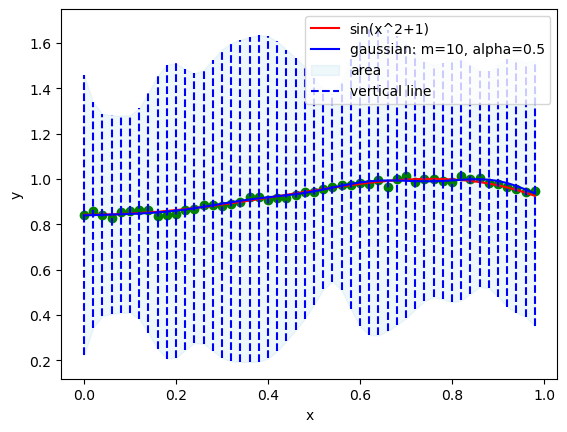

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43]
33


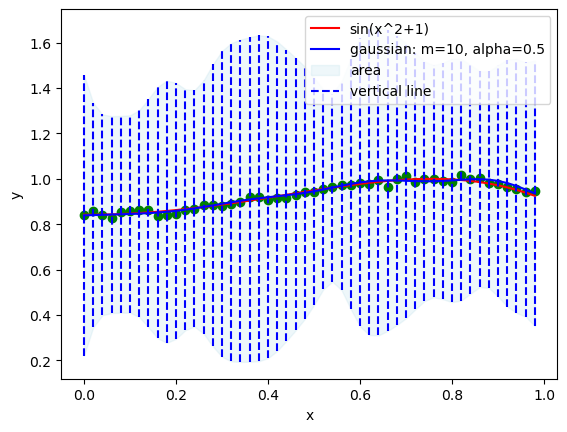

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11]
34


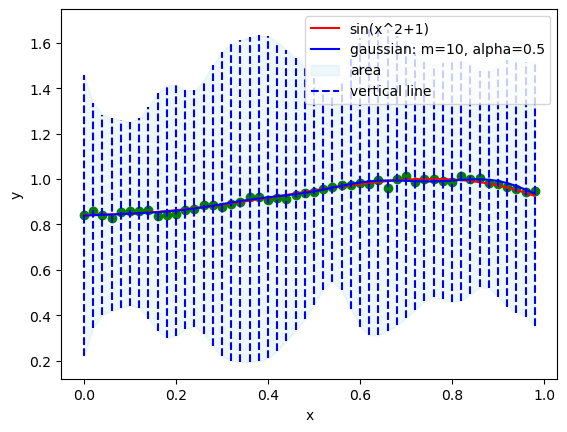

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6]
35


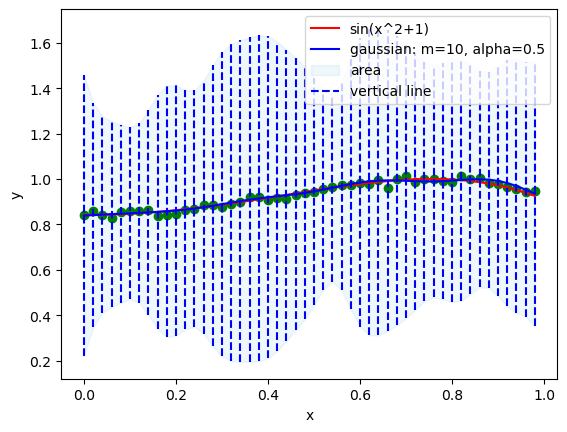

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5]
36


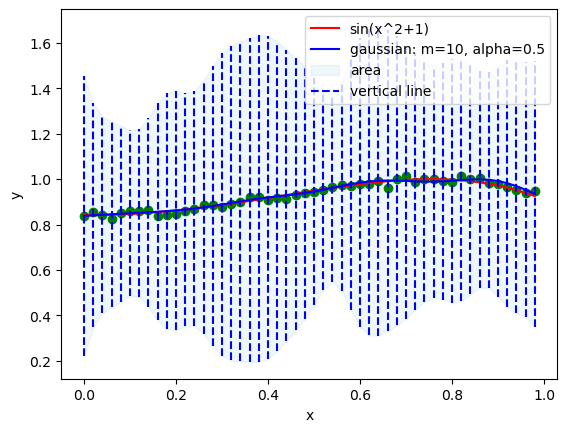

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7]
37


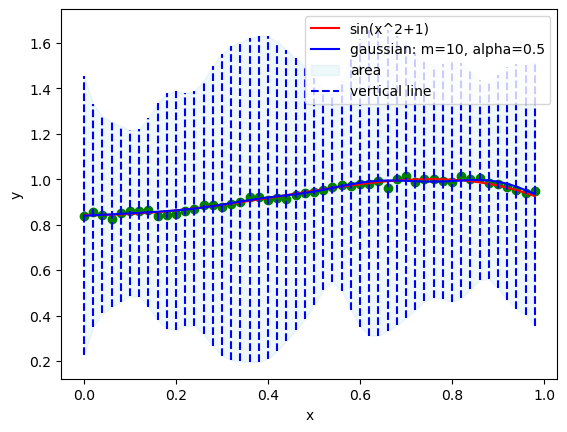

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44]
38


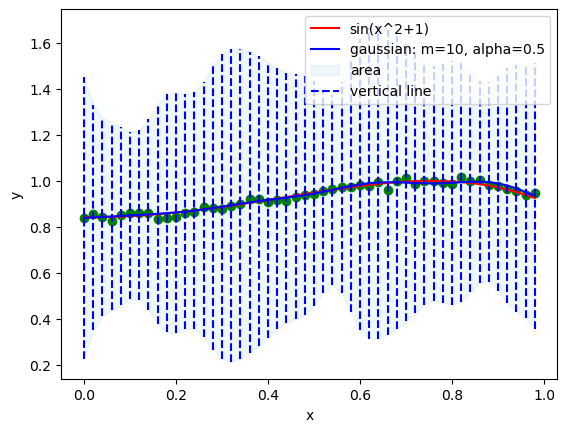

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21]
39


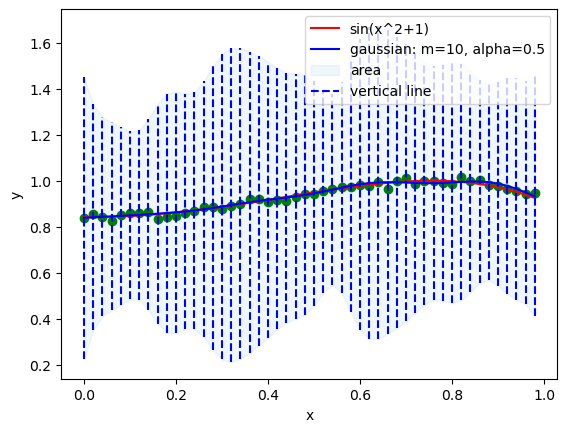

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48]
40


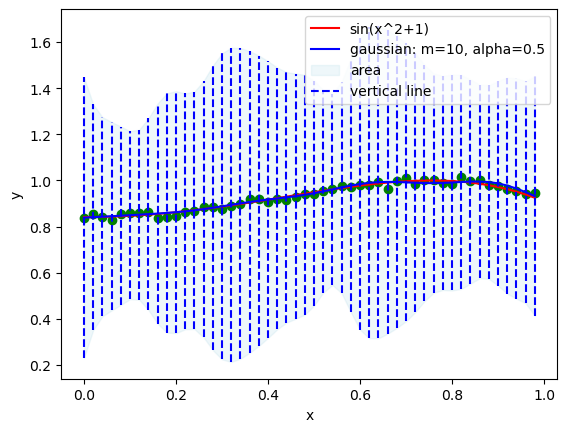

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40]
41


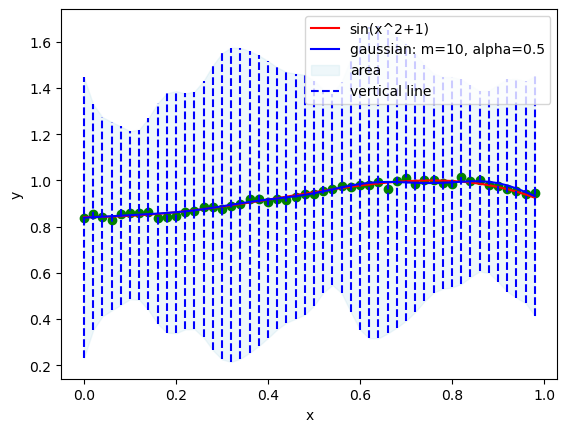

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43]
42


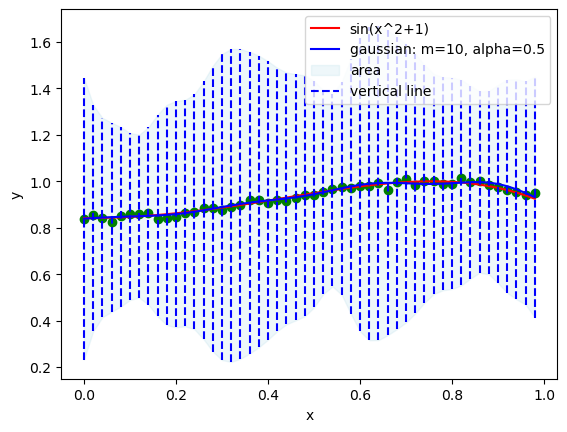

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8]
43


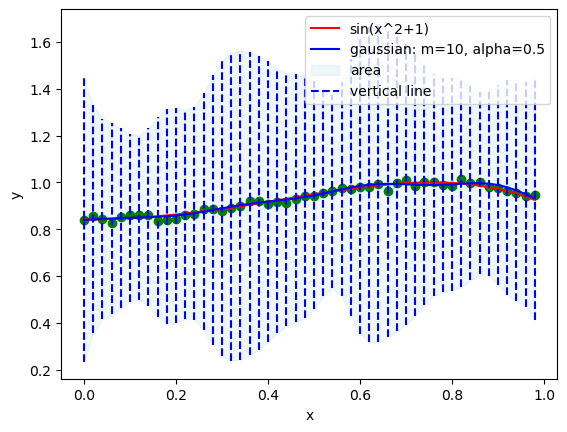

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8, 12]
44


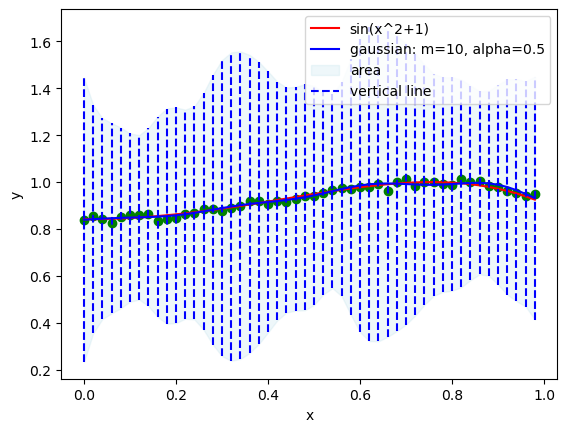

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8, 12, 22]
45


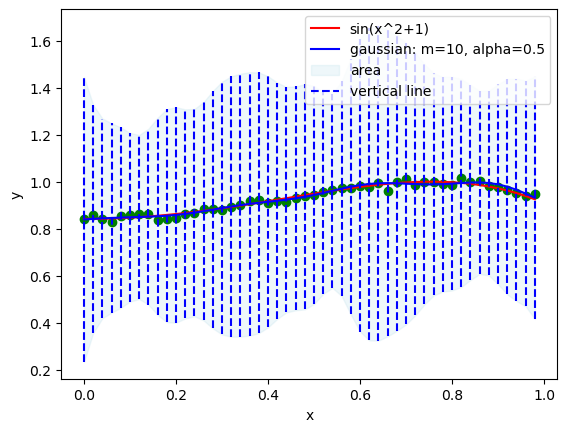

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8, 12, 22, 16]
46


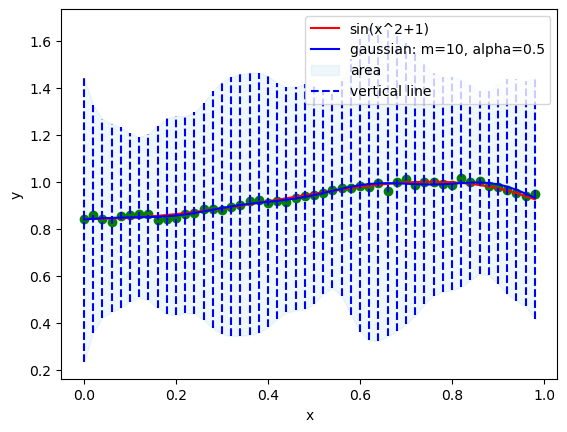

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8, 12, 22, 16, 9]
47


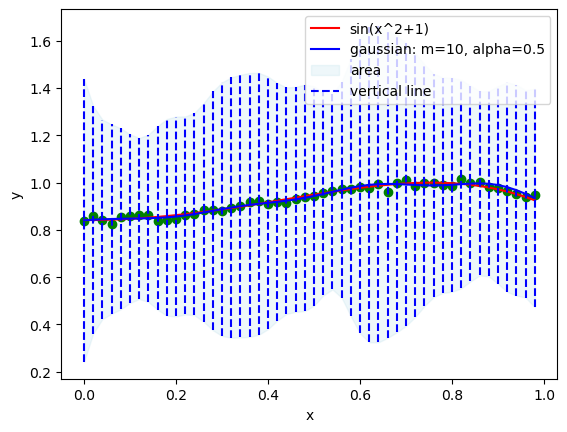

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8, 12, 22, 16, 9, 49]
48


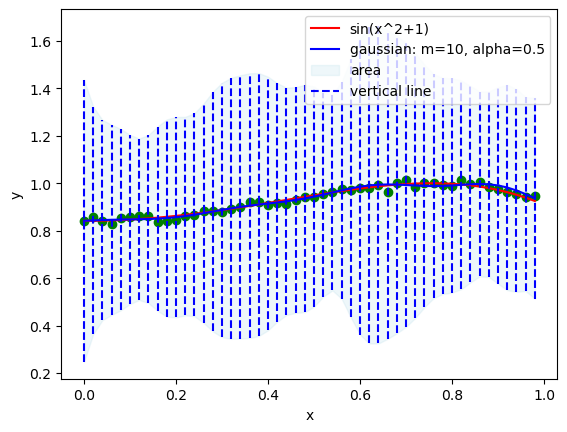

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8, 12, 22, 16, 9, 49, 49]
49


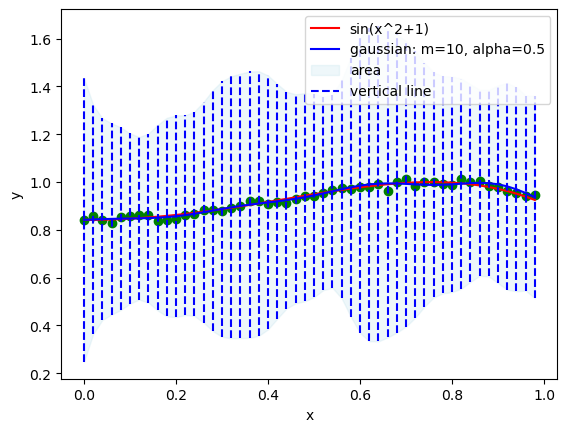

[39, 36, 3, 0, 14, 27, 32, 21, 47, 36, 49, 49, 19, 3, 7, 8, 29, 25, 26, 25, 11, 38, 4, 43, 14, 5, 27, 42, 44, 4, 28, 0, 43, 11, 6, 5, 7, 44, 21, 48, 40, 43, 8, 12, 22, 16, 9, 49, 49, 24]
50


In [86]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


x_arr = []
y_noise_arr = []
i_arr = []
var_2 = 0.01
m = 10
x, y_origin, y_noise, sub_y = get_data(nodes, mu, var_2, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var_2, gaussian, 1.0)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var_2, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(var_2 + el.T @ ss @ el)

    display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)